In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
FILEPATH='data/block_2010_data/nhgis0005_csv'
relevant_cols = ['GISJOIN', 'STATEA', 'COUNTYA', 'H7X001', 'H7X002', 'H7X003', 'H7X004', 
                               'H7X005', 'H7X006', 'H7X007', 'H7X008']
race_raw = pd.read_csv(f'{FILEPATH}/nhgis0005_ds172_2010_block.csv', 
                       usecols=relevant_cols, 
                       dtype={'GISJOIN': str, 'STATEA': str, 'COUNTYA': str})
column_mapper = dict(zip(relevant_cols, ['GISJOIN', 'state_fips', 'county_fips', 'total', 'white',
                                        'black', 'american_indian_al_native', 'asian', 
                                        'hawaiian_pac_islander', 'other', 'two_plus']))
race_raw.rename(columns=column_mapper, inplace=True)
print("Race data loaded.")
race_raw.set_index('GISJOIN', inplace=True)
race_raw

Race data loaded.


state_fips county_fips  total  white  black  \
GISJOIN                                                          
G06000104001001000         06         001      0      0      0   
G06000104001001001         06         001      0      0      0   
G06000104001001002         06         001      0      0      0   
G06000104001001003         06         001      0      0      0   
G06000104001001004         06         001      0      0      0   
...                       ...         ...    ...    ...    ...   
G42013300240022033         42         133     19     18      0   
G42013300240022034         42         133     48     48      0   
G42013300240022035         42         133     16     16      0   
G42013300240022036         42         133     44     35      2   
G42013300240022037         42         133     19     19      0   

                    american_indian_al_native  asian  hawaiian_pac_islander  \
GISJOIN                                                                       
G06000104001001000                          0      0                      0   
G06000104001001001                          0      0                      0   
G06000104001001002                          0      0                      0   
G06000104001001003                          0      0                      0   
G06000104001001004                          0      0                      0   
...                                       ...    ...                    ...   
G42013300240022033                          0      0                      0   
G42013300240022034                          0      0                      0   
G42013300240022035                          0      0                      0   
G42013300240022036                          0      0                      0   
G42013300240022037                          0      0                      0   

                    other  two_plus  
GISJOIN                              
G06000104001001000      0         0  
G06000104001001001      0         0  
G06000104001001002      0         0  
G06000104001001003      0         0  
G06000104001001004      0         0  
...                   ...       ...  
G42013300240022033      0         1  
G42013300240022034      0         0  
G42013300240022035      0         0  
G42013300240022036      0         7  
G42013300240022037      0         0  

[2699631 rows x 10 columns]

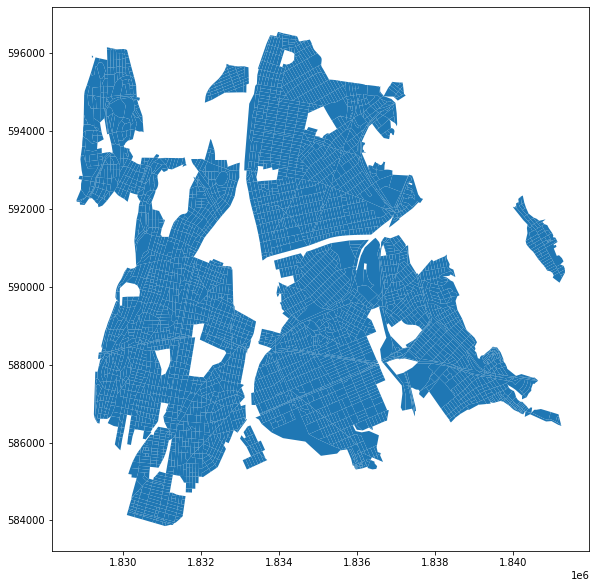

In [3]:
bronx_blocks = gpd.read_file(
    'data/block_2010_data/nhgis0005_shape/nhgis0005_shapefile_tl2010_360_block_2010/NY_block_2010.shp').set_index('GEOID10')
bronx_rl_cw = pd.read_csv('data/outputs/Bronx_blocks_2010_crosswalk.csv', dtype={'block_id_2010': str}).set_index('block_id_2010')
bronx_blocks = bronx_blocks.join(bronx_rl_cw, how='outer').dropna().set_index('GISJOIN')
bronx_blocks.plot(figsize=(10,10))

In [4]:
bronx = bronx_blocks.join(race_raw, how='outer').dropna()

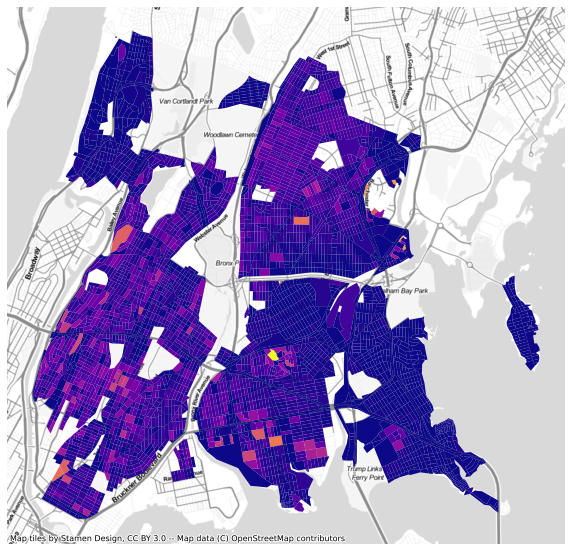

In [5]:
import contextily as ctx
def plot_map(df, column, figsize=(10,10), cmap='plasma'):
    ax = df.to_crs(epsg=3857).plot(figsize=figsize, cmap=cmap, column=column)
    ax.set_axis_off()
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

plot_map(bronx, 'black')

In [6]:
R = bronx.groupby('holc_id_uq').sum().filter(['total', 'white', 'black', \
    'american_indian_al_native', 'asian', 'hawaiian_pac_islander', \
    'hawaiian_pac_islander', 'other', 'two_plus'])

In [7]:
R

total  white  black  american_indian_al_native  asian  \
holc_id_uq                                                           
A0            8707   6914    836                         18    373   
A1             977    824     84                          0     33   
B10           4718   1087    865                         85    425   
B11          24409   5540   6703                        453   1415   
B12          15033   2868   4130                        276    277   
B2            9257   5975   1147                         44    758   
B3            2980   2317    122                          5    290   
B4            1179    763    135                          6    134   
B5           17347  13688   1301                         44    916   
B6            7151   6427    257                         13     81   
B7            1630    660    242                         17    101   
B8          142397  36618  37966                       2356   8170   
B9           11077   2908   2201                        149    781   
C13          45005  16293   9475                        516   2003   
C14          33195   9548   9265                        508   2795   
C15          20365   5188   4147                        247   3951   
C16          33765  21722   4402                        251   1156   
C17           8177   7366     95                         15    145   
C18          16507  11242   1075                        121    610   
C19          24387  13782   3055                        174   2117   
C20          26965  13613   3673                        249   2831   
C21          24059   2952  14783                        249   1123   
C22          58913  16917  25853                        602   2450   
C23          33422   8503  18823                        222   1551   
C24          57451   9944  24027                        811    313   
C25           2743    183   2234                          6     13   
C26          24389   5345  15248                        143    368   
C27          26908   2136  21314                        137    656   
C28           4289   3667    146                         23    138   
C29          73874  14449  24408                       1364   1917   
C30          30440   5360  11819                        502    580   
C31          35529   5346  16714                        457    328   
C32          10876   2497   3627                        181     69   
C33          11107   2609   4946                        192    140   
C34          14344   3155   4772                        188   1613   
C35          54312  13386  17543                        838   1575   
D36          39436   2487  32176                        306    360   
D37          38846  11978  11427                        670    599   
D38          27156   5960  11816                        425    121   
D39          47059   7001  24224                        805    166   
D40          57843  13899  21006                       1110    513   
D41         112153  26378  37931                       2146    815   
D42          31147   6824  14855                        292    423   
E43          21556   3521  11915                        145   2253   

            hawaiian_pac_islander  hawaiian_pac_islander  other  two_plus  
holc_id_uq                                                                 
A0                              0                      0    346       220  
A1                              0                      0     22        14  
B10                             1                      1   1920       335  
B11                            18                     18   8714      1566  
B12                            24                     24   6204      1254  
B2                              3                      3    942       388  
B3                              0                      0    188        58  
B4                              2                      2    108        31  
B5                             1

In [8]:
def city_entropy(R, P):
    """
    Computes entropy of a city-region (see White, 1986).

    Parameters
    ----------
    R : numpy.ndarray
        i-by-j matrix, where i=districts and j=ethnicities.
    P : numpy.array
        i-length vector of the total population in a city-region.
    
    Returns
    -------
    int
        citywide segregation entropy score.
    """
    # define key terms in algorithm
    N = sum(P)
    i, j = R.shape
    R_prop = np.nan_to_num(np.apply_along_axis(lambda column: column / P, 0, R))
    r_hat = R.sum(axis=0) / N

    
    def entropy(x):
        """compute an entropy score with region ethnicity proportion vector x."""
        with np.errstate(divide='ignore'):
            vec = np.log(x)
        vec[np.isneginf(vec)] = 0 # fix special case where 0 * ln(0) = 0
        return (-1) * sum(x*vec)
    
    # compute district-level entropy scores
    h_i = list(map(entropy, R_prop))

    # compute city-wide entropy
    H_hat = entropy(r_hat)
    H_bar = sum((P/N) * h_i)
    
    return (H_hat - H_bar) / H_hat


In [9]:
def chain_to_entropy(chainobj, blocks):
    """
    Takes element in Markov Chain and computes entropy score using the partition map.
    Parameters
    ----------
    chainobj : gerrychain.partition.partition.Partition
        Partition object that dictates which elements belong to which partitions.
    blocks : geopandas.GeoDataFrame
        Dataframe containing the map's census blocks and associated race information.
    
    Returns
    -------
    int
        entropy score using the partition data from Markov Chain element.
    """
    # use partition parts and grouping to create R and P
    R = blocks.drop(columns=['geometry']).copy()
    R['partition'] = blocks.index.map(dict(chainobj.assignment))
    R = R.groupby('partition').sum()
    R, P = R.to_numpy()[:, 1:], R.to_numpy()[:, 0]

    return city_entropy(R, P)

In [14]:
race_matrix = bronx.filter(['total', 'white', 'black', 'american_indian_al_native', 'asian', 'hawaiian_pac_islander', 'other', 'two_plus', 'holc_id_uq', 'geometry'])
race_matrix.rename(columns={'holc_id_uq': 'partition'}, inplace=True)
race_matrix

total  white  black  american_indian_al_native  asian  \
GISJOIN                                                                     
G36000500002001000    290     97     71                          3     20   
G36000500002001001    254     98     57                          5      0   
G36000500002001002    266    102     64                          4      0   
G36000500002001003    246    105     86                          3      1   
G36000500002001004     64     22      8                          0      0   
...                   ...    ...    ...                        ...    ...   
G36000500516004008    194    173      7                          0      5   
G36000500516004009     91     77      1                          0      6   
G36000500516004010     38     36      0                          0      2   
G36000500516004011     63     48      1                          3      0   
G36000500516004012      8      8      0                          0      0   

                    hawaiian_pac_islander  other  two_plus partition  \
GISJOIN                                                                
G36000500002001000                      0     76        23       C33   
G36000500002001001                      0     91         3       C33   
G36000500002001002                      0     90         6       C33   
G36000500002001003                      0     36        15       C33   
G36000500002001004                      5     22         7       C33   
...                                   ...    ...       ...       ...   
G36000500516004008                      0      4         5       C28   
G36000500516004009                      0      5         2       C28   
G36000500516004010                      0      0         0       C28   
G36000500516004011                      0     11         0       C28   
G36000500516004012                      0      0         0       C28   

                                                             geometry  
GISJOIN                                                                
G36000500002001000  POLYGON ((1835598.689 586298.306, 1835682.953 ...  
G36000500002001001  POLYGON ((1835610.753 586063.373, 1835538.549 ...  
G36000500002001002  POLYGON ((1835538.549 586031.738, 1835466.430 ...  
G36000500002001003  POLYGON ((1835466.430 586000.470, 1835393.818 ...  
G36000500002001004  POLYGON ((1835722.973 586199.231, 1835754.938 ...  
...                                                               ...  
G36000500516004008  POLYGON ((1841085.312 590537.908, 1840863.692 ...  
G36000500516004009  POLYGON ((1841100.903 590509.617, 1841119.338 ...  
G36000500516004010  POLYGON ((1841135.251 590447.689, 1841147.149 ...  
G36000500516004011  POLYGON ((1841181.871 590363.471, 1841076.508 ...  
G36000500516004012  POLYGON ((1841219.866 590295.619, 1841256.882 ...  

[4452 rows x 10 columns]

In [15]:
def compute_total_pop(partition):
    global race_matrix
    R = race_matrix.drop(columns=['geometry']).copy()
    R['partition'] = race_matrix.index.map(dict(partition.assignment))
    return R.groupby('partition').sum()['total'].to_dict()

In [16]:
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain, proposals, updaters, constraints, accept)
from gerrychain.updaters import Tally
from gerrychain.proposals import recom, propose_chunk_flip, propose_random_flip
from gerrychain.constraints import districts_within_tolerance, no_vanishing_districts, WithinPercentRangeOfBounds
from gerrychain.accept import always_accept
from functools import partial
from tqdm.notebook import tqdm
import networkx as nx

graph = Graph.from_geodataframe(race_matrix, adjacency='queen')

(1828175.0277392135, 1841954.8388901455, 583222.7003499774, 597164.0849535092)

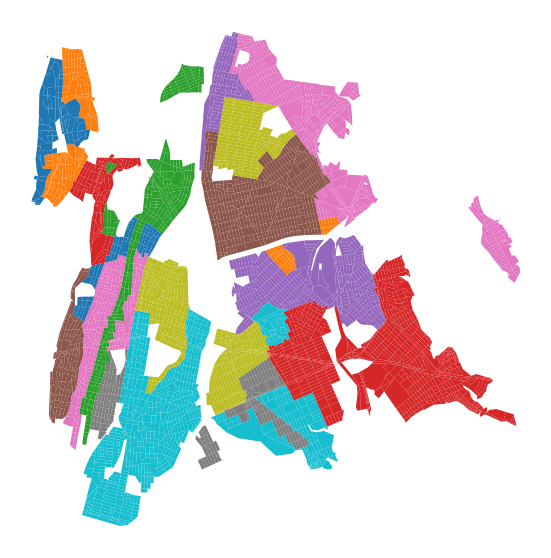

In [17]:
nx.set_node_attributes(graph, race_matrix['total'].to_dict(), name='population')
init_partition = Partition(graph, 
                    assignment=race_matrix.to_dict()['partition'],
                    updaters={'population' : Tally('population')})
init_partition.plot(figsize=(10,10))
plt.axis('off')

977

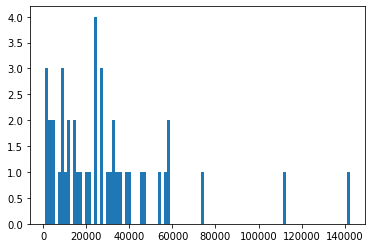

In [19]:
import seaborn as sns
plt.hist(list(init_partition['population'].values()), bins=100)
np.percentile(list(init_partition['population'].values()), [2.5, 97.5])
min(list(init_partition['population'].values()))

In [24]:
ideal_population = sum(compute_total_pop(init_partition).values()) / len(init_partition)
from gerrychain.constraints import Validator, LowerBound
mean_pop = lambda part: np.mean(list(part['population'].values()))
min_pop = lambda part: min(list(part['population'].values()))
is_valid = Validator([WithinPercentRangeOfBounds(mean_pop, 25), LowerBound(min_pop, 0)])
BURN_IN = 1000
STEP_COUNT = 100000 + BURN_IN
proposal = partial(recom, 
                    pop_col='population', 
                    pop_target=ideal_population,
                    epsilon=100,
                    node_repeats=20000000)
chain = MarkovChain(proposal=propose_chunk_flip, 
                    constraints=is_valid,
                    accept=always_accept, 
                    initial_state=init_partition, 
                    total_steps=STEP_COUNT)
print('Prereqs created, chain running...')
# burn-in of 1000
iter(chain)
print("Burn-in:")
_ = [next(chain) for i in tqdm(range(BURN_IN))]
entropies = [chain_to_entropy(next(chain), race_matrix) for i in tqdm(range(STEP_COUNT - BURN_IN))]
chain = None
# np.save("results/arrays/bronx_cf_100000.npy", entropies)

Prereqs created, chain running...
Burn-in:


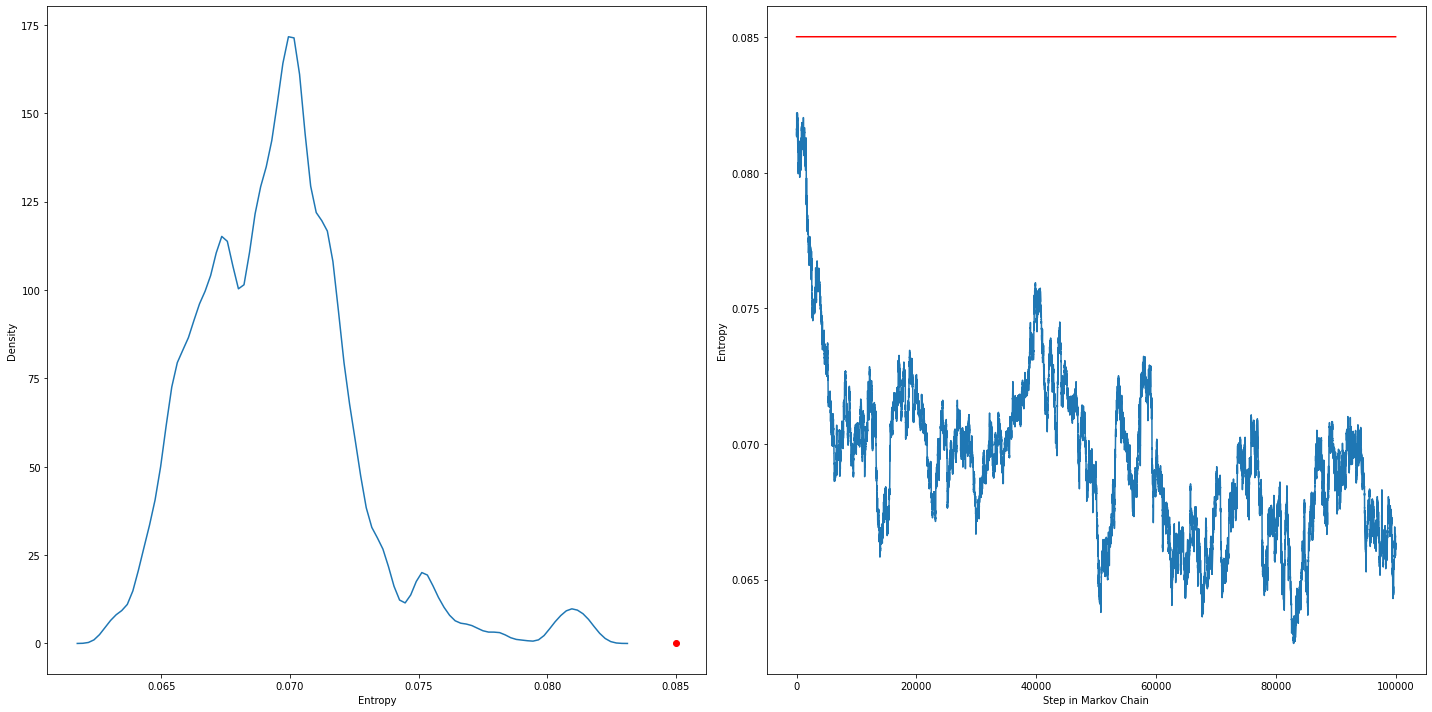

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.xlabel("Entropy")
plt.ylabel("Density")
sns.kdeplot(entropies)
plt.scatter(city_entropy(R.to_numpy()[:, 1:], R.to_numpy()[:, 0]), 0, c='r')

plt.subplot(1, 2, 2)
plt.xlabel("Step in Markov Chain")
plt.ylabel("Entropy")
plt.plot(np.arange(STEP_COUNT - 1000), entropies)
plt.plot(np.arange(STEP_COUNT - 1000), np.repeat(city_entropy(R.to_numpy()[:, 1:], R.to_numpy()[:, 0]), STEP_COUNT - 1000), c='r')

plt.tight_layout()
# plt.savefig("results/plots/bronx_cf_100000.png")